In [1]:
from sklearn.neural_network import BernoulliRBM
from sklearn import datasets
import numpy as np
import matplotlib.pylab as plt
import scipy.stats as stats
import pandas as pd
from scipy.stats import expon

1. Target Dis($f$): Normal Distribution
    
    Proposal Dis($g$): Exponential Distribution ($\lambda = 1$)
    
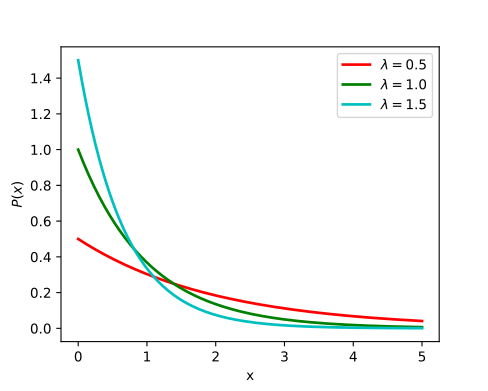

2. $y$~$g$ 
   >y = np.random.exponential(scale=1/lambda_param)



In [2]:
def target_dis(x):
    mean = 0.5
    std = 0.1
    return np.exp(-0.5 * ((x - mean) / std) ** 2) / (std * np.sqrt(2 * np.pi))


In [3]:
def proposal_dis(x, lambda_param=1):
    return expon.pdf(x, scale=1 / lambda_param)


def rejection_sampling(num_samples, M, lambda_param=1):
    y_a = []  # to store accepted y
    y_r = []  # to store rejected y
    u_Mg_a = []
    u_Mg_r = []
    while len(y_a) < num_samples:
        y = np.random.exponential(scale=1 / lambda_param)
        u = np.random.uniform(0, 1)
        if u < target_dis(y) / (M * proposal_dis(y)):
            u_Mg_a.append(u * M * proposal_dis(y))  # <- u*M*g(y) if y is accepted
            y_a.append(y)
        else:
            u_Mg_r.append(u * M * proposal_dis(y))  # <- u*M*g(y) if y is rejected
            y_r.append(y)
    return u_Mg_a, u_Mg_r, y_a, y_r


acceptance rate: 0.0877808988764045


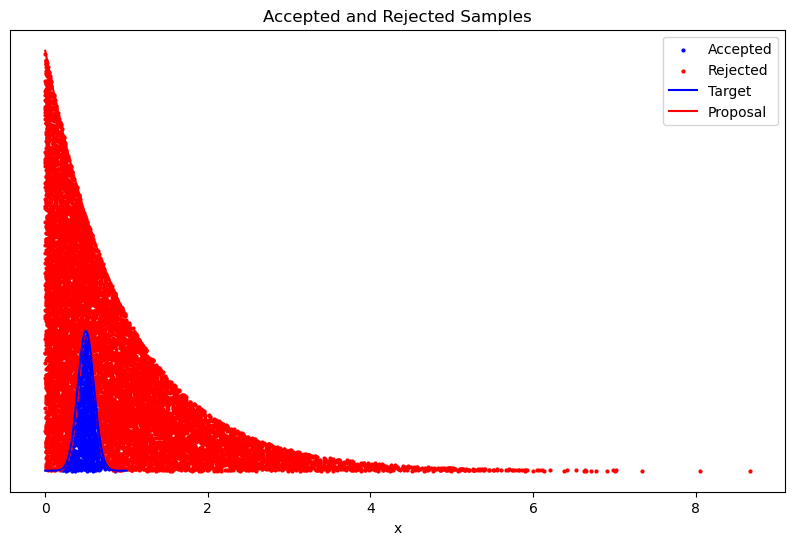

In [4]:
# Number of samples
num_samples = 1000
M = 12  # Constant factor for proposal function

# Generate samples using rejection sampling
u_Mg_a, u_Mg_r, x_a, x_r = rejection_sampling(num_samples, M)

print("acceptance rate:", num_samples / (num_samples + len(u_Mg_r)))


# Plot the accepted and rejected samples
plt.figure(figsize=(10, 6))
plt.scatter(x_a, u_Mg_a, color="blue", label="Accepted", s=4)
plt.scatter(x_r, u_Mg_r, color="red", label="Rejected", s=4)
x = np.linspace(0, 1, 1000)
target = target_dis(x)
proposal = M * proposal_dis(x)
plt.plot(x, target, color="blue", label="Target")
plt.plot(x, proposal, color="red", label="Proposal")
plt.xlabel("x")
plt.yticks([])
plt.legend()
plt.title("Accepted and Rejected Samples")
plt.show()

Decrease the value of M, which will increase the acceptance rate. <- Limitation "2"

In [5]:
# Number of samples
num_samples = 1000
M = 1  # Constant factor for proposal function

# Generate samples using rejection sampling
u_Mg_a, u_Mg_r, x_a, x_r = rejection_sampling(num_samples, M)

print("acceptance rate:", num_samples / (num_samples + len(u_Mg_r)))

acceptance rate: 0.2997601918465228
